# Dependencies installation
we'll first try to fetch a pre-installed dependencies from google-drive, if it doesn't exist, we'll install it there for faster loading next *time*

In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np

from src.general_methods import multi_run
from src.optics.channel_simulation import ChannelSimulator
from src.optics.split_step_fourier import SplitStepFourier
from src.general_methods.visualizer import Visualizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Deep Learning research

## BER vs normalization factor

SSF params: N = 5000, P_0 = 0.00042666666666666667
number of iterations in split step algo: 5000
normalizing factors are: [3.16e-04 6.31e-04 1.26e-03 2.51e-03 5.01e-03 1.00e-02 2.00e-02 3.98e-02
 7.94e-02 1.58e-01 3.16e-01 6.31e-01 1.26e+00 2.51e+00 5.01e+00 1.00e+01]


100%|██████████| 48/48 [00:11<00:00,  4.30it/s]


64 symbols: errors found = [  0   0   0   0   0   0   0   0   0   4 278 397 404 390 345 390] / [768 = 256 bits * 3 realisations]


100%|██████████| 48/48 [00:22<00:00,  2.17it/s]


128 symbols: errors found = [  0   1   0   0   0   0   0   0   0  17 627 800 777 791 766 742] / [1536 = 512 bits * 3 realisations]


100%|██████████| 48/48 [00:49<00:00,  1.03s/it]


256 symbols: errors found = [   0    0    0    0    0    0    0    0    0   37 1266 1633 1555 1525
 1568 1537] / [3072 = 1024 bits * 3 realisations]


100%|██████████| 48/48 [01:49<00:00,  2.28s/it]

512 symbols: errors found = [   0    0    0    0    0    0    0    0    0   53 2466 3247 3063 3070
 3085 3066] / [6144 = 2048 bits * 3 realisations]


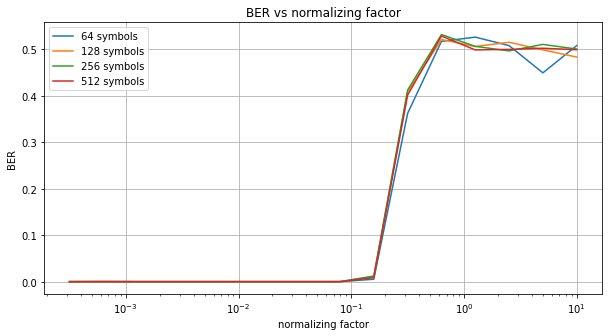

In [6]:
# test the impact of ber vs normalization factor for multiple n_symbols
ssf = SplitStepFourier(
    b2=-20e-27,
    gamma=0.003,
    t0=125e-12,
    z_n=1000e3,
    dt=1,
    h=200
)
cs = ChannelSimulator(m_qam=16,dt=1, verbose=False, ssf=ssf)

num_realisations = 3
us_vec = multi_run.create_us_vec(n_steps=16, min_u=-3.5, max_u=1)
N_symbols_vec = np.array([64, 128, 256, 512])

with np.printoptions(precision=2):
    print(f'normalizing factors are: {us_vec}')

    bers_vec, legends = [], []
    for n_sym in N_symbols_vec:
        cs.num_symbols = n_sym
        bers, errs = multi_run.ber_vs_us(cs, us_vec, n_realisations=num_realisations)
        print(f'{n_sym} symbols: errors found = {errs} / [{cs.length_of_msg * num_realisations} '
              f'= {cs.length_of_msg} bits * {num_realisations} realisations]')
        bers_vec.append(bers)
        legends.append(f'{n_sym} symbols')

Visualizer.plot_bers(us_vec, bers_vec, legends)